<a href="https://colab.research.google.com/github/takaharei/zikken3-1/blob/main/%E5%AE%9F%E9%A8%933%E3%80%804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データ読み込みをするにはデータファイルを事前にアップロードしておく必要がある

In [ ]:
######################
# data1.xlsxの読み込み
######################
!pip install xlrd

import numpy as np
import math
import matplotlib.pyplot as plt
import xlrd

Npre = 16 # プリアンブルシンボル数
Ndata = 32  # データシンボル数

from google.colab import files
uploaded_file = files.upload()
filename = next(iter(uploaded_file))
print(filename)

wb = xlrd.open_workbook('data1.xlsx')               # エクセルの読み込み

p = wb.sheet_by_name('プリアンブルビット系列')      # 数値を読み込みたいシートを選択
m_pre = np.array(p.col_values(0))                   # プリアンブルビット系列を読み込み
d = wb.sheet_by_name('データ系列')
m_data = np.array(d.col_values(0))                  # データ系列を読み込み

sheet = wb.sheet_by_name('変調信号')
col1 = np.array(sheet.col_values(0))
col1 = np.delete(col1,0,0)
col1 = np.array([float(s) for s in col1])           # u_Iデータを読み込み
col2 = np.array(sheet.col_values(1))
col2 = np.delete(col2,0,0)
col2 = np.array([float(s) for s in col2])           # u_Qデータを読み込み

u1 = col1+1j*col2                                   # 変調信号

u_hat_pre = np.delete(u1,range(Npre,Npre+Ndata),0)  # 受信プリアンブル信号
u_hat_data = np.delete(u1,range(Npre),0)            # 受信データビット信号

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving data1.xlsx to data1 (1).xlsx
data1.xlsx


In [ ]:
fc = 100;                 # 搬送波周波数 [Hz] 
R  = 100;                 # シンボルレート [symbols/sec]
T  = 1/R;                 # シンボル周期
Fs = R*10;                # サンプリング周波数（シンボル周期の10倍）
Ts = 1/Fs;                # サンプル周期
M = Npre+Ndata       # シンボル数（QPSK：2ビット/シンボル)
mm = np.arange(M);
n_pre = np.arange(Npre*2);    # プリアンブルビット数
n_data = np.arange(Ndata*2);  # データビット数
N  = round(T/Ts);         # シンボル当たりのサンプル数
n  = np.arange(M*N);      
t  = n*Ts;                # 時間  
pi = math.pi;


In [ ]:
rI = col1;
rQ = col2;
r_uI = [];
r_uQ = [];
for ii in range(M):
    r_uI = np.append(r_uI,rI[ii]);
    r_uQ = np.append(r_uQ,rQ[ii]);

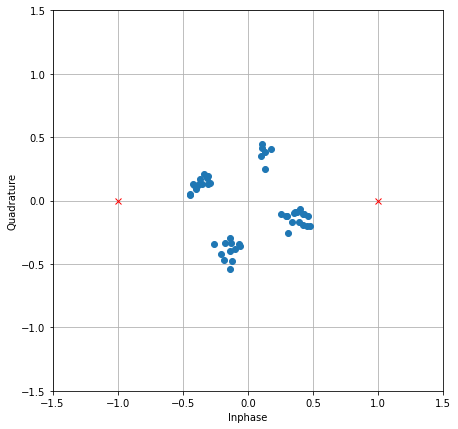

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(-1, 0, 'xr')
ax.plot(1, 0, 'xr')
ax.plot(r_uI, r_uQ, 'o')
ax.set_xlabel("Inphase")
ax.set_ylabel("Quadrature")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid("both")

In [ ]:
#プリアンブルを複素数に変換
car = np.exp(np.array(1j*2*pi*fc*t));  # 搬送波（1周期/シンボル）
g_t = np.ones(N);  
uI = np.zeros(M);
uQ = np.zeros(M);
uI_t = [];
uQ_t = [];

for ii in range(16):
  jj = ii*2
  if m_pre[jj] == 0 and m_pre[jj+1] == 0:
    ph = math.pi/4       #π/4
  elif m_pre[jj] == 0 and m_pre[jj+1] == 1:
    ph  = math.pi*3/4    #3π/4
  elif m_pre[jj] == 1 and m_pre[jj+1] == 1:
    ph = math.pi*5/4     #5π/4
  else:
    ph = math.pi*7/4    #7π/4     
  
  # 符号系列
  uI[ii] = math.cos(ph);
  uQ[ii] = math.sin(ph);
      
  # 基底帯域信号
  uI_t = np.hstack((uI_t, uI[ii]));
  uQ_t = np.hstack((uQ_t, uQ[ii]));


In [ ]:
#シンボル点の補償を行うためhハットを導出
H = 0;
for ii in range(16):
  H += (col1[ii] + 1j*col2[ii]) * (uI[ii] + (- 1j*uQ[ii])) 
h = H/16

[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇
〇


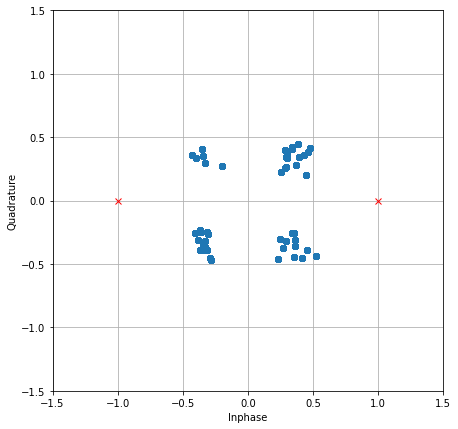

In [ ]:
#ビット系列が正しいか確認し、シンボル点の補償を行う．
uu = 3 * (col1 + 1j*col2) * (h.real - (1j*h.imag))
rI = uu.real;
rQ = uu.imag;
r_uI = [];
r_uQ = [];
for ii in range(M):
  r_uI = np.append(r_uI,rI); #np.mean(rI[(ii*N):((ii+1)*N-1)]));
  r_uQ = np.append(r_uQ,rQ); #np.mean(rQ[(ii*N):((ii+1)*N-1)]));

bitdat = [];
for ii in range(M):
  if r_uI[ii] > 0 and r_uQ[ii] > 0:
    bitdat0 = 0,0  
  elif r_uI[ii] < 0 and r_uQ[ii] > 0: 
    bitdat0 = 0,1
  elif r_uI[ii] < 0 and r_uQ[ii] < 0:
    bitdat0 = 1,1
  else:
    bitdat0 = 1,0                
  bitdat = np.append(bitdat, bitdat0);
print (bitdat)
m = np.concatenate([m_pre, m_data], 0)
print(m)

for ii in range(96):
  if bitdat[ii] != m[ii]:
    print("間違いあり")
  else:
    print("〇")


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(-1, 0, 'xr')
ax.plot(1, 0, 'xr')
ax.plot(r_uI, r_uQ, 'o')
ax.set_xlabel("Inphase")
ax.set_ylabel("Quadrature")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid("both")



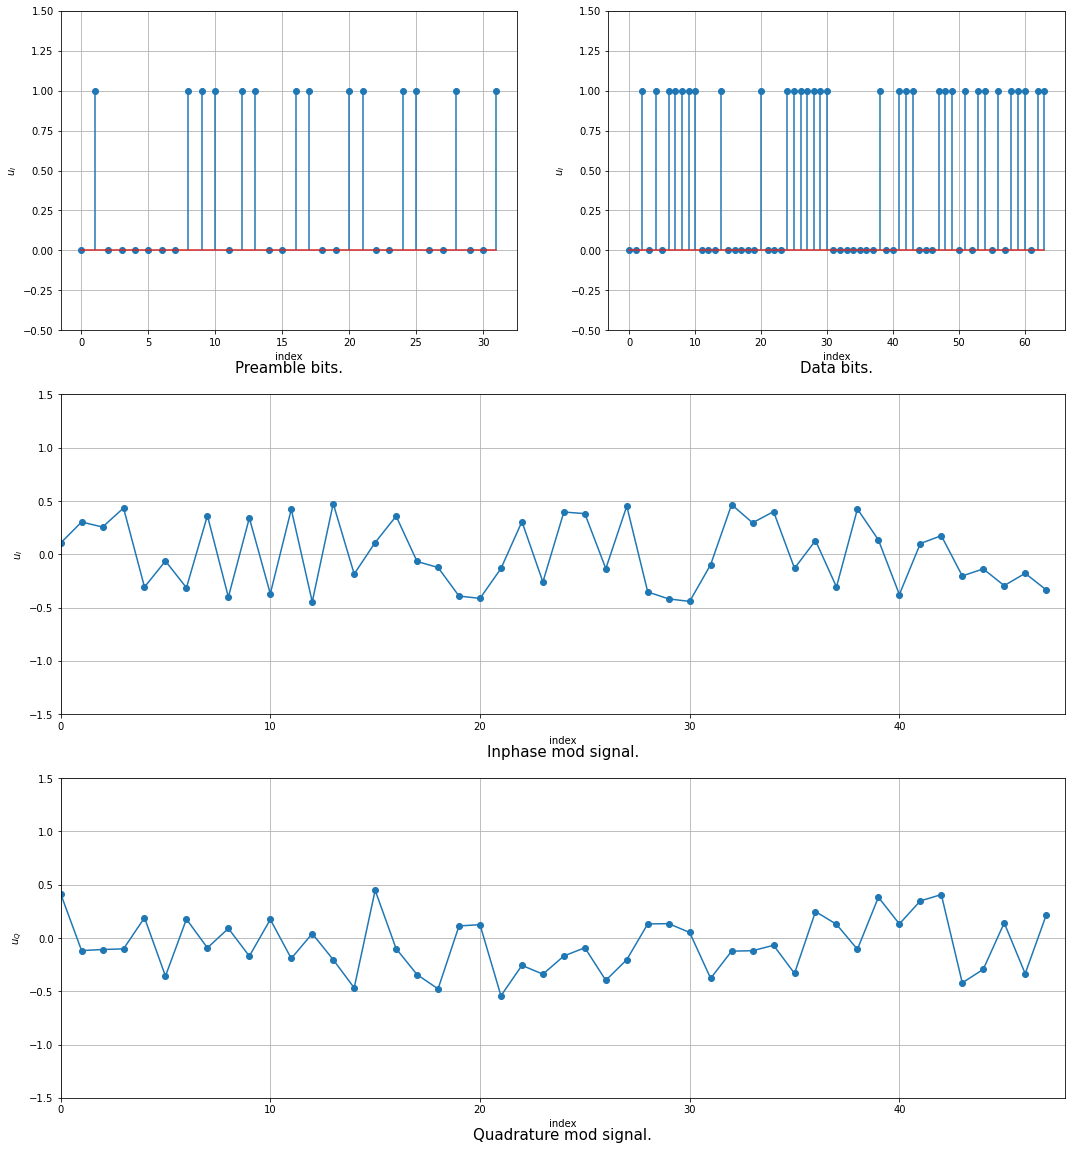

In [ ]:
fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(321)
ax1.stem(n_pre, m_pre,use_line_collection=True);
ax1.set_xlabel("index")
ax1.set_ylabel("$u_I$")
ax1.set_ylim(-0.5,1.5)
ax1.grid("both")
plt.title("Preamble bits.",y=-0.15,fontsize = 15);

ax2 = fig.add_subplot(322)
ax2.stem(n_data, m_data,use_line_collection=True)
ax2.set_xlabel("index");
ax2.set_ylabel("$u_I$")
ax2.set_ylim(-0.5,1.5)
ax2.grid("both")
plt.title("Data bits.",y=-0.15,fontsize = 15);

ax3 = fig.add_subplot(312)
ax3.plot(mm, col1, '-o')
ax3.set_xlabel("index")
ax3.set_ylabel("$u_I$")
ax3.set_xlim(0,t[-1]/T)
ax3.set_ylim(-1.5,1.5)
ax3.grid("both")
plt.title("Inphase mod signal.",y=-0.15,fontsize = 15);

ax4 = fig.add_subplot(313)
ax4.plot(mm, col2, '-o')
ax4.set_xlabel("index")
ax4.set_ylabel("$u_Q$")
ax4.set_xlim(0,t[-1]/T)
ax4.set_ylim(-1.5,1.5)
ax4.grid("both")
plt.title("Quadrature mod signal.",y=-0.15,fontsize = 15);